In [4]:
import pandas as pd
df=pd.read_csv("House_analysis_data_is_cleaned.csv")
df

,Title,Locality,Furnishing,Built_up_area,Lease_type,Available_from,Price,Bathrooms,Balcony,Carpet_area,Gas_Pipeline,Gate_Community,Floor_number,Total_floors,BHK_Number,Property_Title,Locality_area
0,2.5 BHK Flat for Rent,"Tirumanahalli, Bangalore",Semi Furnished,1265,Family / Bachelor / Company,Available now,42006,2,1.0,795.0,Yes,Yes,3.0,24.0,2.5,Flat,Tirumanahalli
1,1 BHK Flat for Rent,"BTM Layout, Bangalore",Fully Furnished,700,Family / Bachelor / Company,Available now,28500,1,1.0,600.0,Yes,Yes,5.0,7.0,1.0,Flat,BTM Layout
2,2 BHK Flat for Rent,"Mahadevapura, Bangalore",Semi Furnished,1185,Family / Bachelor / Company,"Nov, 2025",38000,2,1.0,850.0,No,No,3.0,4.0,2.0,Flat,Mahadevapura
3,3 BHK Flat for Rent,"Gunjur Village, Bangalore",Semi Furnished,1655,Family,Available now,65000,3,3.0,1304.0,No,Yes,26.0,30.0,3.0,Flat,Gunjur Village
4,1 RK Independent House for Rent,"Mahadevapura, Bangalore",Fully Furnished,400,Family / Bachelor,Available now,18000,1,1.0,850.0,No,No,3.0,6.0,1.0,Independent House,Mahadevapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1 BHK Flat for Rent,"R.K. Hegde Nagar, Bangalore",Semi Furnished,750,Family / Bachelor / Company,Available now,18000,1,2.0,650.0,Yes,Yes,3.0,4.0,1.0,Flat,R.K. Hegde Nagar
396,1 BHK Flat for Rent,"S.G. Palya, Bangalore",Fully Furnished,690,Family / Bachelor,Available now,29000,1,1.0,600.0,Yes,Yes,5.0,7.0,1.0,Flat,S.G. Palya
397,1 BHK Flat for Rent,"Kannuru, Bangalore",Fully Furnished,1074,Family / Bachelor / Company,Available now,150008,2,1.0,754.0,Yes,Yes,4.0,16.0,1.0,Flat,Kannuru
398,4 BHK Flat for Rent,"Jakkur, Bangalore",Semi Furnished,2020,Family / Company,Available now,90000,4,1.0,1980.0,No,Yes,7.0,19.0,4.0,Flat,Jakkur


In [5]:
df["Lease_type"] = df["Lease_type"].astype("category")
df["Gate_Community"] = df["Gate_Community"].map({"Yes": 1, "No": 0})
df["Gas_Pipeline"] = df["Gas_Pipeline"].map({"Yes": 1, "No": 0})
df["Available_from"] = df["Available_from"].replace(
    "Available now", pd.Timestamp.today().date()
)
df["Available_from"] = pd.to_datetime(df["Available_from"], errors="coerce")
df["Locality_area"] = df["Locality_area"].astype("category")

df["Property_Title"] = df["Property_Title"].astype("category")
# Convert BHK_Number from float to int
df["BHK_Number"] = df["BHK_Number"].astype("float")

df["Furnishing"] = df["Furnishing"].astype("category")



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           400 non-null    object        
 1   Locality        400 non-null    object        
 2   Furnishing      400 non-null    category      
 3   Built_up_area   400 non-null    int64         
 4   Lease_type      400 non-null    category      
 5   Available_from  400 non-null    datetime64[ns]
 6   Price           400 non-null    int64         
 7   Bathrooms       400 non-null    int64         
 8   Balcony         400 non-null    float64       
 9   Carpet_area     400 non-null    float64       
 10  Gas_Pipeline    400 non-null    int64         
 11  Gate_Community  400 non-null    int64         
 12  Floor_number    400 non-null    float64       
 13  Total_floors    400 non-null    float64       
 14  BHK_Number      400 non-null    float64       
 15  Proper

In [5]:
df

,Title,Locality,Furnishing,Built_up_area,Lease_type,Available_from,Price,Bathrooms,Balcony,Carpet_area,Gas_Pipeline,Gate_Community,Floor_number,Total_floors,BHK_Number,Property_Title,Locality_area
0,2.5 BHK Flat for Rent,"Tirumanahalli, Bangalore",Semi Furnished,1265,Family / Bachelor / Company,2025-11-24,42006,2,1.0,795.0,1,1,3.0,24.0,2.5,Flat,Tirumanahalli
1,1 BHK Flat for Rent,"BTM Layout, Bangalore",Fully Furnished,700,Family / Bachelor / Company,2025-11-24,28500,1,1.0,600.0,1,1,5.0,7.0,1.0,Flat,BTM Layout
2,2 BHK Flat for Rent,"Mahadevapura, Bangalore",Semi Furnished,1185,Family / Bachelor / Company,2025-11-01,38000,2,1.0,850.0,0,0,3.0,4.0,2.0,Flat,Mahadevapura
3,3 BHK Flat for Rent,"Gunjur Village, Bangalore",Semi Furnished,1655,Family,2025-11-24,65000,3,3.0,1304.0,0,1,26.0,30.0,3.0,Flat,Gunjur Village
4,1 RK Independent House for Rent,"Mahadevapura, Bangalore",Fully Furnished,400,Family / Bachelor,2025-11-24,18000,1,1.0,850.0,0,0,3.0,6.0,1.0,Independent House,Mahadevapura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1 BHK Flat for Rent,"R.K. Hegde Nagar, Bangalore",Semi Furnished,750,Family / Bachelor / Company,2025-11-24,18000,1,2.0,650.0,1,1,3.0,4.0,1.0,Flat,R.K. Hegde Nagar
396,1 BHK Flat for Rent,"S.G. Palya, Bangalore",Fully Furnished,690,Family / Bachelor,2025-11-24,29000,1,1.0,600.0,1,1,5.0,7.0,1.0,Flat,S.G. Palya
397,1 BHK Flat for Rent,"Kannuru, Bangalore",Fully Furnished,1074,Family / Bachelor / Company,2025-11-24,150008,2,1.0,754.0,1,1,4.0,16.0,1.0,Flat,Kannuru
398,4 BHK Flat for Rent,"Jakkur, Bangalore",Semi Furnished,2020,Family / Company,2025-11-24,90000,4,1.0,1980.0,0,1,7.0,19.0,4.0,Flat,Jakkur


In [7]:
df.to_csv("House_analysis_data_is_cleaned(2).csv")

In [8]:
# New derived column
df["area_for_psqft"] = df["Carpet_area"].fillna(df["Built_up_area"])
df["price_per_sqft"] = df["Price"] / df["area_for_psqft"]

In [9]:
df

,Title,Locality,Furnishing,Built_up_area,Lease_type,Available_from,Price,Bathrooms,Balcony,Carpet_area,Gas_Pipeline,Gate_Community,Floor_number,Total_floors,BHK_Number,Property_Title,Locality_area,area_for_psqft,price_per_sqft
0,2.5 BHK Flat for Rent,"Tirumanahalli, Bangalore",Semi Furnished,1265,Family / Bachelor / Company,2025-11-25,42006,2,1.0,795.0,1,1,3.0,24.0,2.5,Flat,Tirumanahalli,795.0,52.837736
1,1 BHK Flat for Rent,"BTM Layout, Bangalore",Fully Furnished,700,Family / Bachelor / Company,2025-11-25,28500,1,1.0,600.0,1,1,5.0,7.0,1.0,Flat,BTM Layout,600.0,47.500000
2,2 BHK Flat for Rent,"Mahadevapura, Bangalore",Semi Furnished,1185,Family / Bachelor / Company,2025-11-01,38000,2,1.0,850.0,0,0,3.0,4.0,2.0,Flat,Mahadevapura,850.0,44.705882
3,3 BHK Flat for Rent,"Gunjur Village, Bangalore",Semi Furnished,1655,Family,2025-11-25,65000,3,3.0,1304.0,0,1,26.0,30.0,3.0,Flat,Gunjur Village,1304.0,49.846626
4,1 RK Independent House for Rent,"Mahadevapura, Bangalore",Fully Furnished,400,Family / Bachelor,2025-11-25,18000,1,1.0,850.0,0,0,3.0,6.0,1.0,Independent House,Mahadevapura,850.0,21.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1 BHK Flat for Rent,"R.K. Hegde Nagar, Bangalore",Semi Furnished,750,Family / Bachelor / Company,2025-11-25,18000,1,2.0,650.0,1,1,3.0,4.0,1.0,Flat,R.K. Hegde Nagar,650.0,27.692308
396,1 BHK Flat for Rent,"S.G. Palya, Bangalore",Fully Furnished,690,Family / Bachelor,2025-11-25,29000,1,1.0,600.0,1,1,5.0,7.0,1.0,Flat,S.G. Palya,600.0,48.333333
397,1 BHK Flat for Rent,"Kannuru, Bangalore",Fully Furnished,1074,Family / Bachelor / Company,2025-11-25,150008,2,1.0,754.0,1,1,4.0,16.0,1.0,Flat,Kannuru,754.0,198.949602
398,4 BHK Flat for Rent,"Jakkur, Bangalore",Semi Furnished,2020,Family / Company,2025-11-25,90000,4,1.0,1980.0,0,1,7.0,19.0,4.0,Flat,Jakkur,1980.0,45.454545


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           400 non-null    object        
 1   Locality        400 non-null    object        
 2   Furnishing      400 non-null    category      
 3   Built_up_area   400 non-null    int64         
 4   Lease_type      400 non-null    category      
 5   Available_from  400 non-null    datetime64[ns]
 6   Price           400 non-null    int64         
 7   Bathrooms       400 non-null    int64         
 8   Balcony         400 non-null    float64       
 9   Carpet_area     400 non-null    float64       
 10  Gas_Pipeline    400 non-null    int64         
 11  Gate_Community  400 non-null    int64         
 12  Floor_number    400 non-null    float64       
 13  Total_floors    400 non-null    float64       
 14  BHK_Number      400 non-null    float64       
 15  Proper

# UNI-VARIATE ANALYSIS (Continuous Variables)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

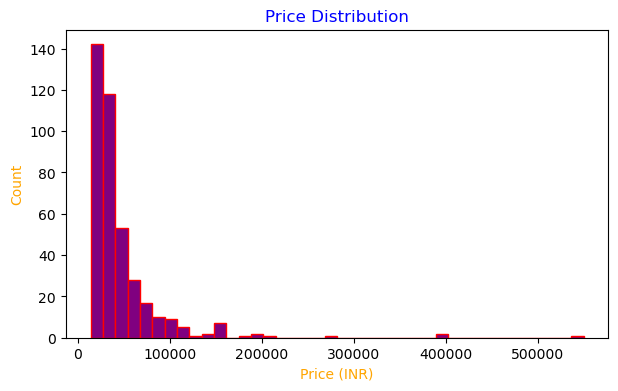

In [23]:
# Histogram: Price
plt.figure(figsize=(7,4))
plt.hist(df["Price"], bins=40, color="purple", edgecolor="red")
plt.title("Price Distribution",color="blue")
plt.xlabel("Price (INR)",color="orange")
plt.ylabel("Count",color="orange")
plt.show()


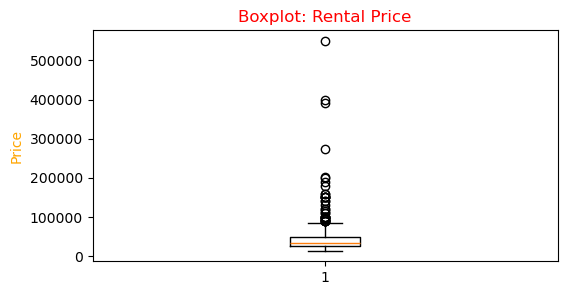

In [27]:
# Boxplot: Price
plt.figure(figsize=(6,3))
plt.boxplot(df["Price"],)
plt.title("Boxplot: Rental Price",color="red")
plt.ylabel("Price",color="orange")
plt.show()


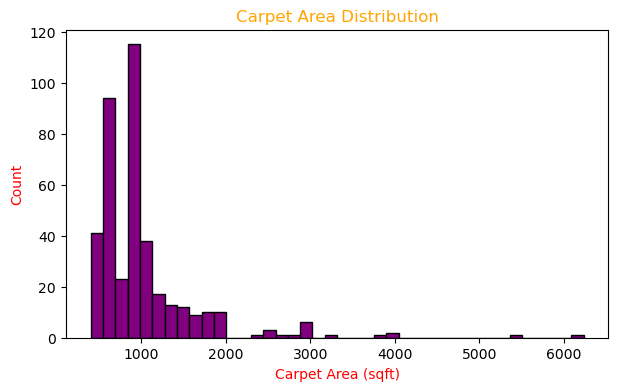

In [29]:
# Histogram: Carpet Area
plt.figure(figsize=(7,4))
plt.hist(df["Carpet_area"], bins=40,color="purple",edgecolor="black")
plt.title("Carpet Area Distribution",color="orange")
plt.xlabel("Carpet Area (sqft)",color="red")
plt.ylabel("Count",color="red")
plt.show()




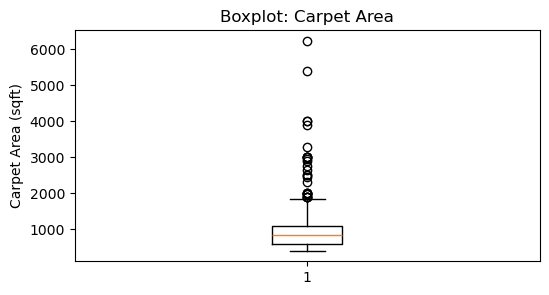

In [16]:
# Boxplot: Carpet Area
plt.figure(figsize=(6,3))
plt.boxplot(df["Carpet_area"])
plt.title("Boxplot: Carpet Area")
plt.ylabel("Carpet Area (sqft)")
plt.show()


# UNI-VARIATE ANALYSIS (Categorical Variables) 

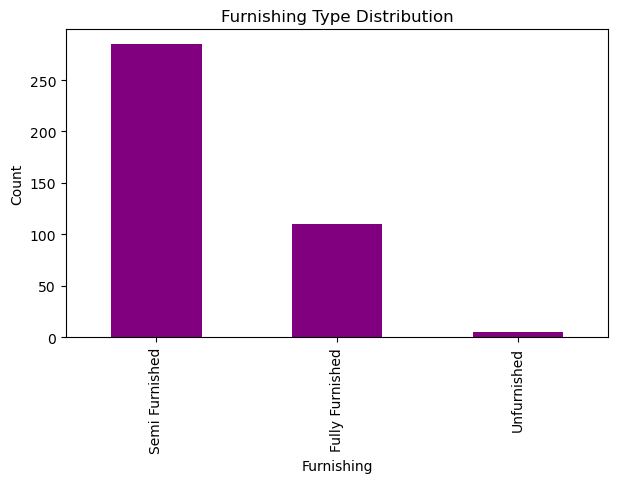

In [30]:
# Furnishing Type Count Plot
df["Furnishing"].value_counts().plot(kind="bar", figsize=(7,4),color="purple")
plt.title("Furnishing Type Distribution",)
plt.xlabel("Furnishing")
plt.ylabel("Count")
plt.show()


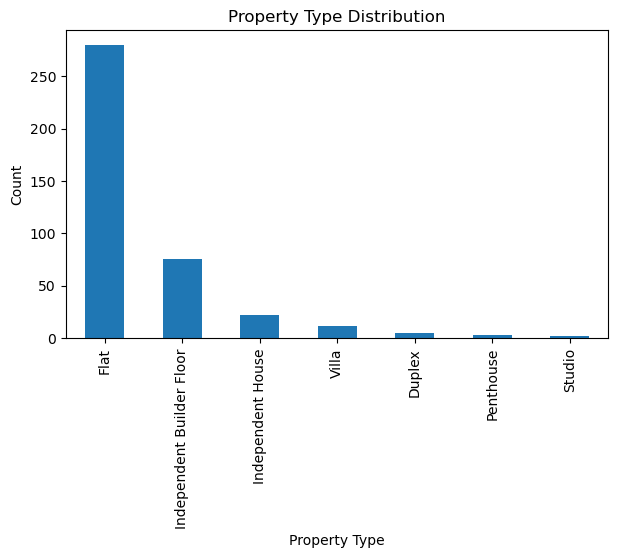

In [18]:
# Property Type Count Plot
df["Property_Title"].value_counts().plot(kind="bar", figsize=(7,4))
plt.title("Property Type Distribution")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.show()


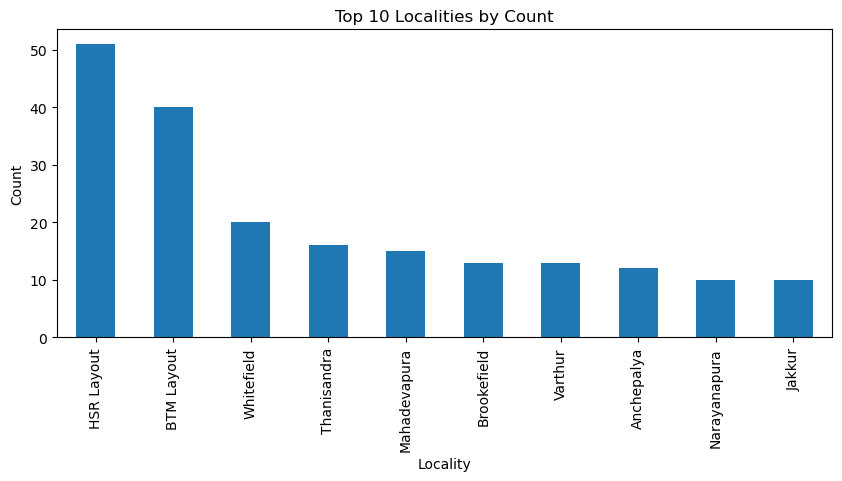

In [19]:
# Top 10 Locality Count Plot
df["Locality_area"].value_counts().head(10).plot(kind="bar", figsize=(10,4))
plt.title("Top 10 Localities by Count")
plt.xlabel("Locality")
plt.ylabel("Count")
plt.show()


# BI-VARIATE & MULTIVARIATE ANALYSIS

<Figure size 700x400 with 0 Axes>

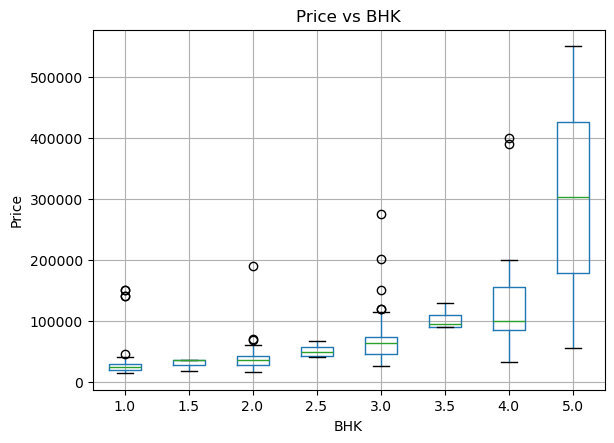

In [30]:
# PRICE vs BHK
# Boxplot of Price vs BHK
plt.figure(figsize=(7,4))
df.boxplot(column="Price", by="BHK_Number")
plt.title("Price vs BHK")
plt.suptitle("")
plt.xlabel("BHK")
plt.ylabel("Price")
plt.show()


In [29]:
# Median price for each BHK
df.groupby("BHK_Number")["Price"].median()


BHK_Number
1.0     25000.0
1.5     36500.0
2.0     36500.0
2.5     49000.0
3.0     63000.0
3.5     95000.0
4.0    100000.0
5.0    302500.0
Name: Price, dtype: float64

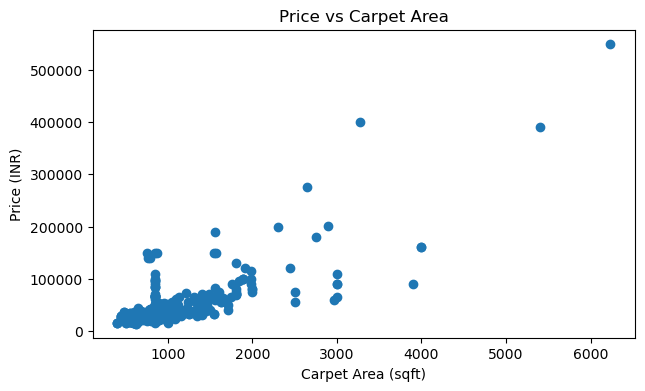

In [31]:
# Scatter Plot (Price vs Carpet Area)
plt.figure(figsize=(7,4))
plt.scatter(df["Carpet_area"], df["Price"])
plt.title("Price vs Carpet Area")
plt.xlabel("Carpet Area (sqft)")
plt.ylabel("Price (INR)")
plt.show()


In [32]:
df["Price"].corr(df["Carpet_area"])


np.float64(0.77040808266905)

In [33]:
# Top 10 Localities by Median Price
# Calculate median price for each locality
top_localities = (
    df.groupby("Locality_area")["Price"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)
top_localities


C:\Users\deven\AppData\Local\Temp\ipykernel_34608\1982224176.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Locality_area")["Price"]


Locality_area
Cox Town                 202000.0
Kannuru                  150000.0
RMV Extension Stage 2    130000.0
Kasavanahalli            110000.0
Hebbal Kempapura         102500.0
Nagavara                 100000.0
Agrahara Layout           95000.0
Cheemasandra              90000.0
Chokkanahalli             85000.0
Hoodi                     82000.0
Name: Price, dtype: float64

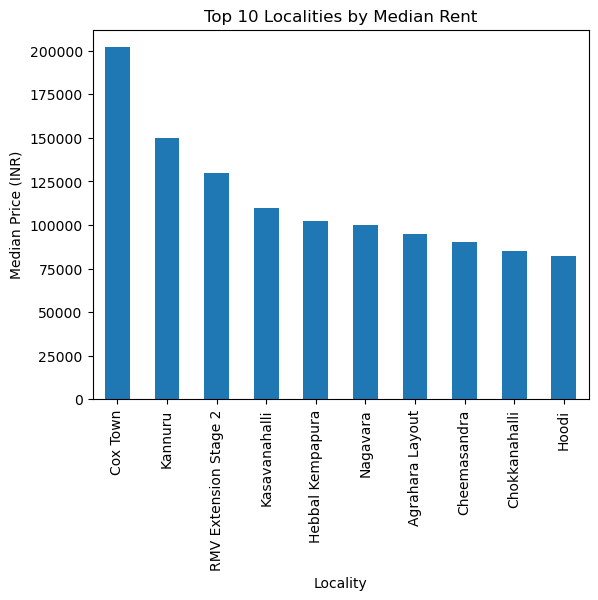

In [34]:
# Bar Plot — Price vs Localityplt.figure(figsize=(10,4))
top_localities.plot(kind="bar")
plt.title("Top 10 Localities by Median Rent")
plt.xlabel("Locality")
plt.ylabel("Median Price (INR)")
plt.show()


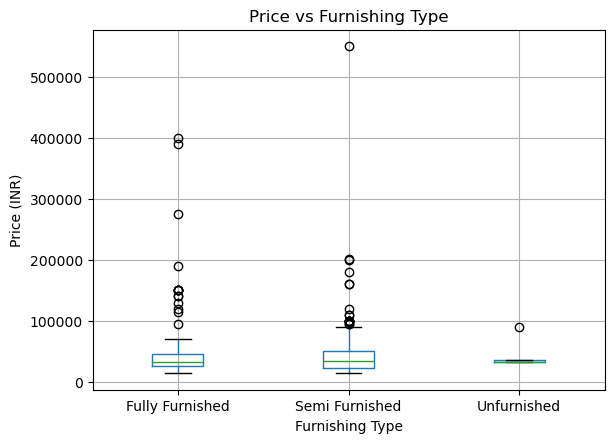

In [35]:
# Boxplot — Price vs Furnishingplt.figure(figsize=(7,4))
df.boxplot(column="Price", by="Furnishing")
plt.title("Price vs Furnishing Type")
plt.suptitle("")
plt.xlabel("Furnishing Type")
plt.ylabel("Price (INR)")
plt.show()


In [36]:
df.groupby("Furnishing")["Price"].median()


C:\Users\deven\AppData\Local\Temp\ipykernel_34608\2389631300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Furnishing")["Price"].median()


Furnishing
Fully Furnished    32500.0
Semi Furnished     35000.0
Unfurnished        32000.0
Name: Price, dtype: float64

<Figure size 800x400 with 0 Axes>

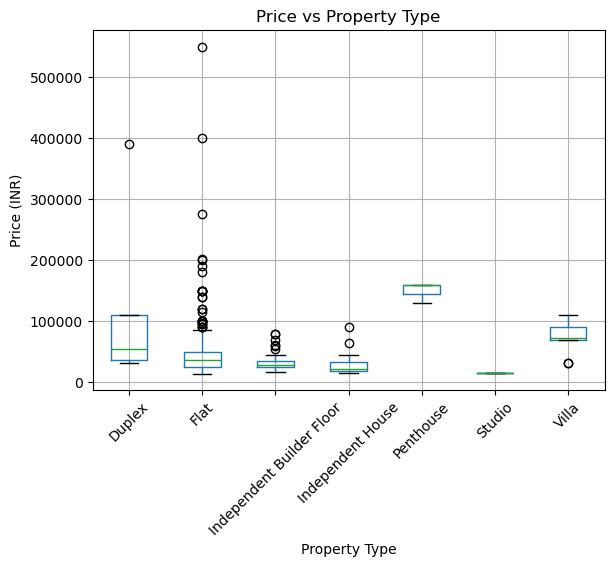

In [37]:
# PRICE vs PROPERTY TYPE
plt.figure(figsize=(8,4))
df.boxplot(column="Price", by="Property_Title")
plt.title("Price vs Property Type")
plt.suptitle("")
plt.xlabel("Property Type")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.show()


In [38]:
df.groupby("Property_Title")["Price"].median().sort_values(ascending=False)


C:\Users\deven\AppData\Local\Temp\ipykernel_34608\490161235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Property_Title")["Price"].median().sort_values(ascending=False)


Property_Title
Penthouse                    160000.0
Villa                         72500.0
Duplex                        55000.0
Flat                          37000.0
Independent Builder Floor     28000.0
Independent House             21250.0
Studio                        15000.0
Name: Price, dtype: float64

<Figure size 700x400 with 0 Axes>

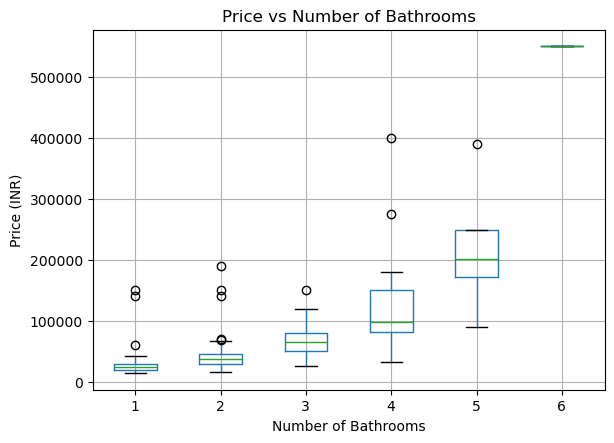

In [39]:
# PRICE vs NUMBER OF BATHROOMS
plt.figure(figsize=(7,4))
df.boxplot(column="Price", by="Bathrooms")
plt.title("Price vs Number of Bathrooms")
plt.suptitle("")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (INR)")
plt.show()


In [40]:
df.groupby("Bathrooms")["Price"].median().sort_index()


Bathrooms
1     25000.0
2     37516.5
3     65000.0
4     97500.0
5    201000.0
6    550000.0
Name: Price, dtype: float64

# MULTIVARIATE ANALYSIS (Correlation Heatmap)

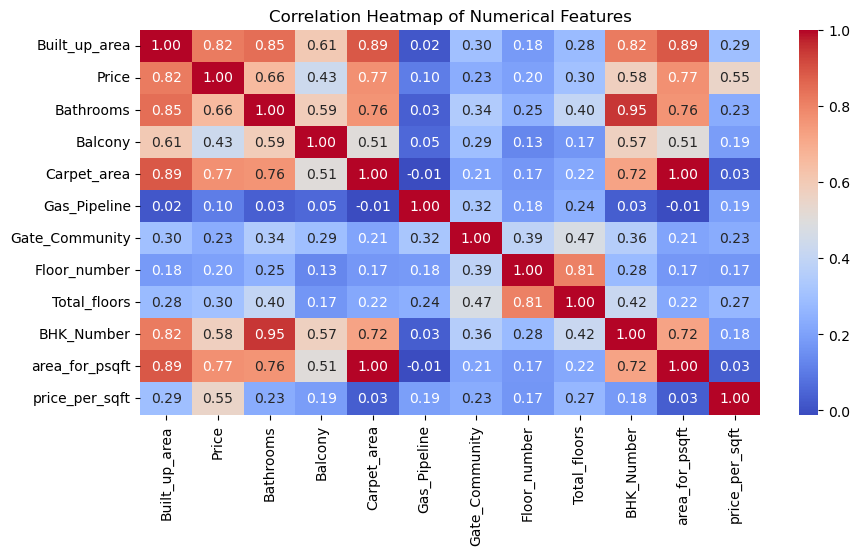

In [42]:
# CORRELATION HEATMAP
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Calculate correlation
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# CROSSTAB ANALYSIS

In [43]:
# Furnishing Type vs Property Type
ct1 = pd.crosstab(df["Furnishing"], df["Property_Title"])
print(ct1)


Property_Title   Duplex  Flat  Independent Builder Floor  Independent House  \
Furnishing                                                                    
Fully Furnished       1    79                         26                  1   
Semi Furnished        4   198                         49                 20   
Unfurnished           0     3                          1                  1   

Property_Title   Penthouse  Studio  Villa  
Furnishing                                 
Fully Furnished          1       2      0  
Semi Furnished           2       0     12  
Unfurnished              0       0      0  


In [44]:
# Lease Type vs Property Type
ct2 = pd.crosstab(df["Lease_type"], df["Property_Title"])
print(ct2)


Property_Title               Duplex  Flat  Independent Builder Floor  \
Lease_type                                                             
Bachelor                          0     0                          2   
Family                            2    31                          4   
Family / Bachelor                 2   111                         34   
Family / Bachelor / Company       0   115                         35   
Family / Company                  1    23                          1   

Property_Title               Independent House  Penthouse  Studio  Villa  
Lease_type                                                                
Bachelor                                     0          0       0      0  
Family                                       3          3       0      2  
Family / Bachelor                            8          0       0      2  
Family / Bachelor / Company                 10          0       2      0  
Family / Company                             

In [45]:
# BHK vs Furnishing
ct3 = pd.crosstab(df["BHK_Number"], df["Furnishing"])
print(ct3)


Furnishing  Fully Furnished  Semi Furnished  Unfurnished
BHK_Number                                              
1.0                      73              91            0
1.5                       0               3            0
2.0                      13             105            4
2.5                       3               5            0
3.0                      16              57            0
3.5                       1               4            0
4.0                       4              18            1
5.0                       0               2            0


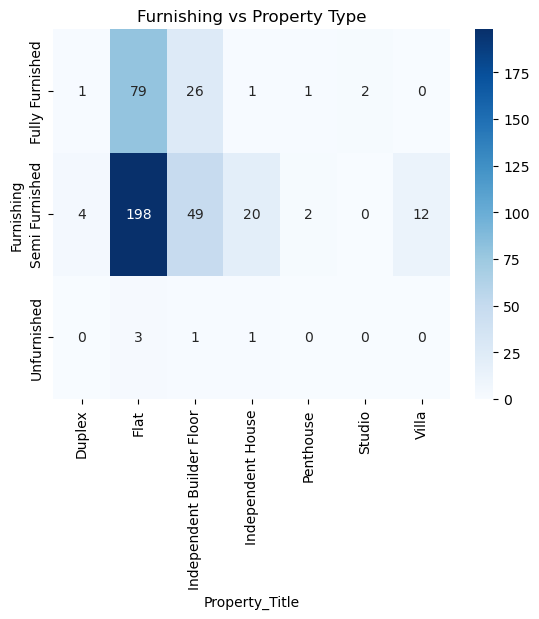

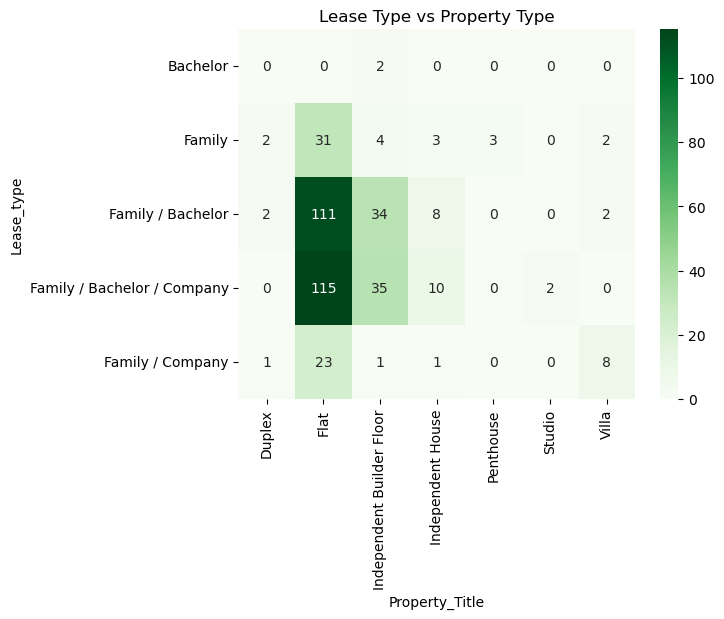

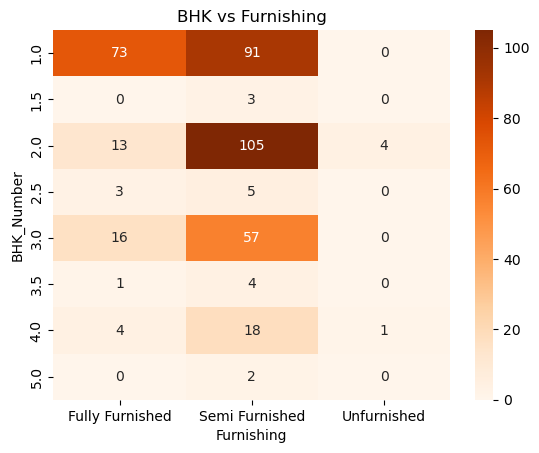

In [46]:
sns.heatmap(ct1, annot=True, fmt="d", cmap="Blues")
plt.title("Furnishing vs Property Type")
plt.show()

sns.heatmap(ct2, annot=True, fmt="d", cmap="Greens")
plt.title("Lease Type vs Property Type")
plt.show()

sns.heatmap(ct3, annot=True, fmt="d", cmap="Oranges")
plt.title("BHK vs Furnishing")
plt.show()
